In [2]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import tensorflow as tf
import cv2

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128

IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = '/content/drive/My Drive/Combined Dataset for sementic segmentation/data/training/'
TEST_PATH = '/content/drive/My Drive/Combined Dataset for sementic segmentation/data/testing/'

train_ids=[]
test_ids=[]

In [0]:
for i in os.listdir(TRAIN_PATH+'images/'):
    l = i.split('.')
    train_ids.append(l[0])

In [8]:
print(len(train_ids))

4176


In [0]:
for i in os.listdir(TEST_PATH+'images/'):
    l = i.split('.')
    train_ids.append(l[0])

In [10]:
# train_ids = next(os.walk(TRAIN_PATH+"images/"))[1]
# test_ids = next(os.walk(TEST_PATH+"images/"))[1]
# print(train_ids)
# print(test_ids)
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)

print('Resizing training images and masks')

Resizing training images and masks


In [0]:
# seed = 42
# np.random.seed = seed

# IMG_WIDTH = 128
# IMG_HEIGHT = 128
# IMG_CHANNELS = 3

# TRAIN_PATH = '/content/drive/My Drive/finalsegmentation/deeplearningsegmentation/training/'
# TEST_PATH = '/content/drive/My Drive/finalsegmentation/deeplearningsegmentation/testing/'

# train_ids = next(os.walk(TRAIN_PATH+"images/"))[1]
# test_ids = next(os.walk(TEST_PATH+"images/"))[1]
# print(train_ids)
# print(test_ids)
# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)

# print('Resizing training images and masks')

In [0]:
os.listdir(path + '/masks/'+id_)

NameError: ignored

In [11]:
import cv2
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
	path = TRAIN_PATH 
	img = imread(path + 'images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
	img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
	# img/= 255.0
	X_train[n] = img
	# mask = np.zeros((IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)
	# for mask_file in os.listdir(path + '/masks/'+id_):
	mask_ = imread(path + '/mask/' +id_ + '.png',as_gray=True )
	v,mask_ = cv2.threshold(mask_,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # mask_=cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
	mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True), axis=-1)
		# mask = np.maximum(mask, mask_)
		# mask/= 255.0	
	Y_train[n] = mask_

 96%|█████████▌| 4176/4366 [49:34<02:29,  1.27it/s]

FileNotFoundError: ignored

In [0]:
# plt.hist(Y_train[11].ravel(),55,[0,256]);
plt.show()
# print(Y_train.shape)
# print(X_train.shape)

In [12]:
# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
# sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH 
    img = imread(path + 'images/' + id_+ '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # img/= 255.0
    X_test[n] = img



0it [00:00, ?it/s]

Getting and resizing test images ... 


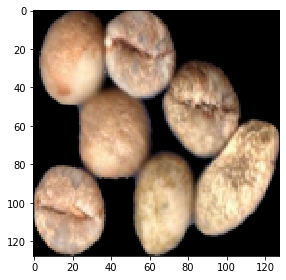

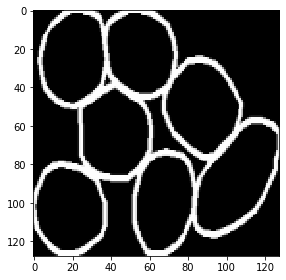

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [13]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()
print(Y_train[image_x])

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Reshape, BatchNormalization, Dropout, Activation, add, concatenate
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adadelta, Adam

In [0]:
# Build U-Net model
smooth=1
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x : x/255)(inputs)
x = BatchNormalization()(s)

conv1 = Conv2D(64, (3,3), activation='elu', padding='same')(x)
conv1 = Conv2D(64, (3,3), activation='relu', padding='same')(conv1)

pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    
conv2 = Conv2D(128, (3,3), activation='elu', padding='same')(pool1)
conv2 = Conv2D(128, (3,3), activation='elu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    
conv3 = Conv2D(256, (3,3), activation='elu', padding='same')(pool2)
conv3 = Conv2D(256, (3,3), activation='elu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    
conv4 = Conv2D(512, (3,3), activation='elu', padding='same')(pool3)
conv4 = Conv2D(512, (3,3), activation='elu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
    
conv5 = Conv2D(1024, (3,3), activation='elu', padding='same')(pool4)
conv5 = Conv2D(1024, (3,3), activation='elu', padding='same')(conv5)

u1=concatenate([Conv2DTranspose(1024, (2,2), strides=(2,2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(512, (3,3), activation='elu', padding='same')(u1)
conv6 = Conv2D(512, (3,3), activation='elu', padding='same')(conv6)

u2 = concatenate([Conv2DTranspose(512, (2,2), strides=(2,2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(256, (3,3), activation='elu', padding='same')(u2)
conv7 = Conv2D(256, (3,3), activation='elu', padding='same')(conv7)

u3 = concatenate([Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(128, (3,3), activation='elu', padding='same')(u3)
conv8 = Conv2D(128, (3,3), activation='elu', padding='same')(conv8)

u4 = concatenate([Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(64, (3,3), activation='elu', padding='same')(u4)
conv9 = Conv2D(64, (3,3), activation='elu', padding='same')(conv9)

conv10 = Conv2D(1, (1,1), activation='sigmoid')(conv9)
def dice_coef(y_true, y_pred):
    y_true_f = K.batch_flatten(y_true)
    y_pred_f = K.batch_flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
# Mask for missing label.
# mask_value = -1
# from keras import backend as K
# def masked_loss_function(y_true, y_pred):
#     mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
#     return K.binary_crossentropy(y_true * mask, y_pred * mask)


# def dice(y_true, y_pred):
#     # Workaround for shape bug. For some reason y_true shape was not being set correctly
#     y_true.set_shape(y_pred.get_shape())

#     # Without K.clip, K.sum() behaves differently when compared to np.count_nonzero()
#     y_true_f = K.clip(K.batch_flatten(y_true), K.epsilon(), 1.)
#     y_pred_f = K.clip(K.batch_flatten(y_pred), K.epsilon(), 1.)

#     intersection = 2 * K.sum(y_true_f * y_pred_f, axis=1)
#     union = K.sum(y_true_f * y_true_f, axis=1) + K.sum(y_pred_f * y_pred_f, axis=1)
#     return K.mean(intersection / union)

model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer= Adadelta(), loss=dice_coef_loss, metrics=["acc"])
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_15 (Lambda)              (None, 128, 128, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 128, 128, 3)  12          lambda_15[0][0]                  
__________________________________________________________________________________________________
conv2d_304 (Conv2D)             (None, 128, 128, 64) 1792        batch_normalization_16[0][0]     
___________________________________________________________________________________________

In [0]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=50, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
# model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
model.fit(X_train, Y_train, batch_size=8, nb_epoch=20, verbose=1, shuffle=True,
              validation_split=0.1,
              callbacks=[callbacks])


####################################

24/24 [==============================] - 3s 109ms/step - loss: -0.9214 - acc: 0.0000e+00 - val_loss: -0.9789 - val_acc: 0.0000e+00


2/2 [==============================] - 0s 34ms/step


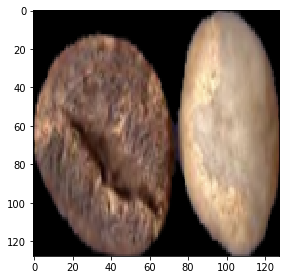

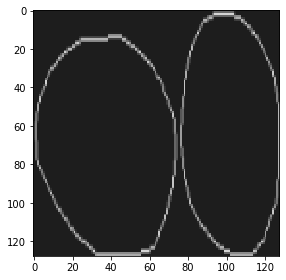

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


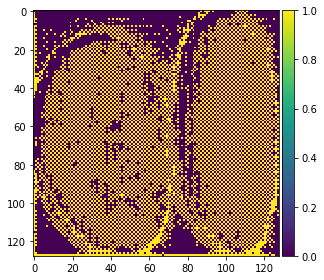

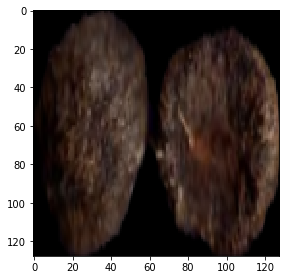

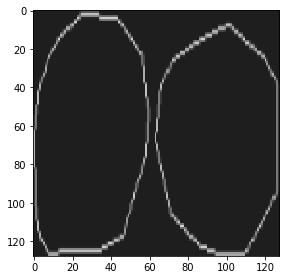

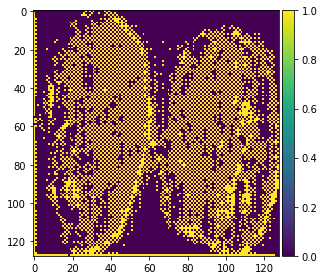

In [0]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)



preds_train_t = (preds_train > 0.5).astype(np.uint8)
# ret,preds_train_t = cv2.threshold(preds_train_t,127,255,cv2.THRESH_BINARY)
preds_val_t = (preds_val >0.5).astype(np.uint8)
# ret,preds_val_t = cv2.threshold(preds_val_t,127,255,cv2.THRESH_BINARY)
preds_test_t = (preds_test >0.5).astype(np.uint8)
# ret,preds_test_t = cv2.threshold(preds_test_t,127,255,cv2.THRESH_BINARY)

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


In [0]:

# for n, id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
# #     print(id_)
#     path = train_path
# #     print(path)
#     img  = cv2.imread(path+'/images/'+id_+'.png')
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img =  resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range = True)
# #     print(img.shape)
#     X_train[n]=img # fill empty  X_train with values from images
#     # mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)
# #     for mask_file in next(os.walk(path+'/Mask/'))[2]:
# # #         print(mask_file)
# #         # mask_ = imread(path+'/Mask/'+mask_file, as_gray=True)
# #         mask_ = cv2.imread(path+'/Mask/'+mask_file, 0)
# #         # print(mask_.shape)
# #         mask_=np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range = True), axis = -1)
# # #         print(mask_.shape)
# #         mask = np.maximum(mask,mask_)
# #     # plt.imshow(mask,cmap="gray")
#     mask=cv2.imread(path+'/mask1/'+id_+'.png',0)
#     mask =  resize(mask,(IMG_HEIGHT,IMG_WIDTH,1),mode='constant',preserve_range = True)
#     print(mask.shape)
#     Y_train[n]=mask

In [0]:
# # tqdm is used to display the progress bar
# X_train=[]
# Y_train=[]
# for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
#     # img = load_img(train_path+"/images/"+id_+".png", grayscale=False)
#     # # [:,:,:IMG_CHANNELS]
#     # x_img = img_to_array(img)
    
#     # x_img = resize(x_img, (128, 128, 3), mode = 'constant', preserve_range = True)
#     image = cv2.imread(train_path+"/images/"+id_+".png", -1)
#     image = cv2.resize(image, (128,128))
#     image = image/255.0
#     print(image.shape)
#     X_train.append(image)
#     # Load masks
#     # mask = img_to_array(load_img(train_path+"/mask/"+id_+".png", grayscale=True))
#     # # mask = imread(train_path+"/mask/"+id_+".png")
#     # mask = resize(mask, (128, 128,1), mode = 'constant', preserve_range = True)
#     # Save images
#     mask = cv2.imread(train_path+"/mask/"+id_+".png", 0)
#     mask = cv2.resize(mask, (128,128))
#     mask = np.expand_dims(mask, axis=-1)
#     mask = mask/255.0
#     print(image.shape)
#     Y_train.append(mask)

  

In [0]:

# X_train_array = np.array(X_train)
# Y_train_array = np.array(Y_train)
# print(len(X_train_array))

# print(len(Y_train_array))

In [0]:
# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

# print('Resizing training images and masks')
# for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):   
#     path = train_path 
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     # print(type(img))
#     # print(img.shape)    
#     X_train[n] = img  #Fill empty X_train with values from img
#     # mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#     # for mask_file in next(os.walk(path + '/masks/'))[2]:
#     mask = imread(path + '/mask/' + id_ + '.png')[:,:,:1] 
#     mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     mask = mask.astype(np.bool)
#     # mask = np.maximum(mask, mask_)  
#     # print(type(mask))
#     # print(mask.shape)
#     Y_train[n] = mask   

In [0]:
# X_test = np.zeros((len(test_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.float32)
# sizes_test=[]
# print("Resizing Test Images...")

In [0]:
# for n, id_ in tqdm_notebook(enumerate(test_ids),total= len(test_ids)):
#     path = test_path
#     # img = cv2.imread(path+"/"+id_+'.png') [:,:,:IMG_CHANNELS]
#     img  = cv2.imread(path+'/'+id_+'.png')
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img_to_array(img)
#     sizes_test.append([img.shape[0],img.shape[1]])
#     img = resize(img,(IMG_HEIGHT,IMG_WIDTH,3),mode='constant',preserve_range = True)
#     # print(img.shape)
#     X_test[n]=img/255.0
# print('Done!')

In [0]:
# # This is the contraction path
# inputs = tf.keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
# # s = tf.keras.layers.Lambda(lambda x : x/255)(inputs)

# c1= tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(inputs)
# c1= tf.keras.layers.Dropout(0.1)(c1)
# c1= tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c1)
# p1= tf.keras.layers.MaxPool2D((2,2))(c1)

# c2= tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(p1)
# c2= tf.keras.layers.Dropout(0.1)(c2)
# c2= tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c2)
# p2= tf.keras.layers.MaxPool2D((2,2))(c2)

# c3= tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(p2)
# c3= tf.keras.layers.Dropout(0.1)(c3)
# c3= tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c3)
# p3= tf.keras.layers.MaxPool2D((2,2))(c3)

# c4= tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(p3)
# c4= tf.keras.layers.Dropout(0.1)(c4)
# c4= tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c4)
# p4= tf.keras.layers.MaxPool2D((2,2))(c4)

# c5= tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(p4)
# c5= tf.keras.layers.Dropout(0.5)(c5)
# c5= tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c5)


# # Expansion Path

# u6= tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
# u6= tf.keras.layers.concatenate([u6,c4])
# c6= tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(u6)
# c6= tf.keras.layers.Dropout(0.1)(c6)
# c6= tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c6)

# u7= tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
# u7= tf.keras.layers.concatenate([u7,c3])
# c7= tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(u7)
# c7= tf.keras.layers.Dropout(0.1)(c7)
# c7= tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c7)

# u8= tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
# u8= tf.keras.layers.concatenate([u8,c2])
# c8= tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(u8)
# c8= tf.keras.layers.Dropout(0.1)(c8)
# c8= tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c8)

# u9= tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
# u9= tf.keras.layers.concatenate([u9,c1],axis=3)
# c9= tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(u9)
# c9= tf.keras.layers.Dropout(0.5)(c9)
# c9= tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding= 'same')(c9)

# outputs = tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

# model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
# model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics= ['accuracy'])



In [0]:
# model.summary()

In [0]:
# # Modelcheckpoint

# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_segmentation.h5',save_best_only= True)
# callbacks = [tf.keras.callbacks.EarlyStopping(patience=2,monitor= 'val_loss'),
#              tf.keras.callbacks.TensorBoard(log_dir='logs')]
# results =model.fit(X_train_array,Y_train_array,validation_split=0.1,batch_size=11,epochs=100,callbacks=callbacks)

9/9 [==============================] - 0s 19ms/step


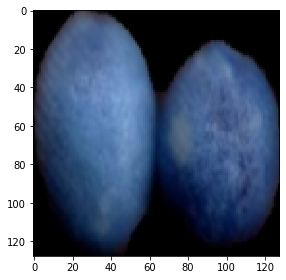

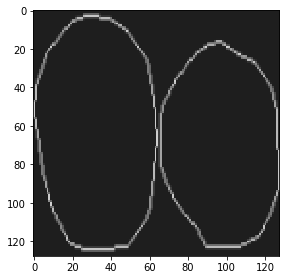

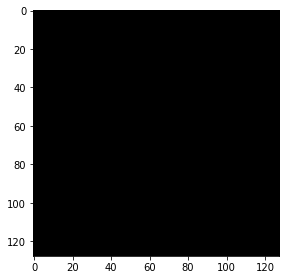

1


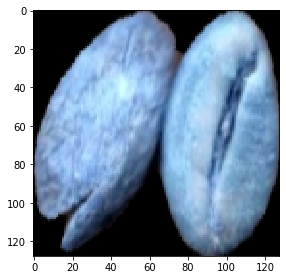

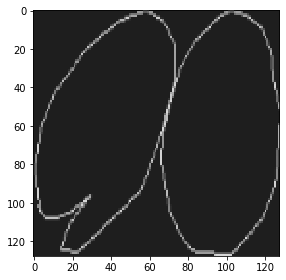

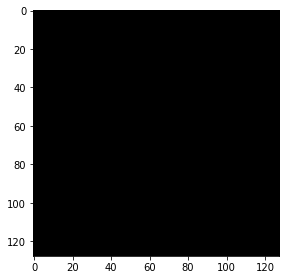

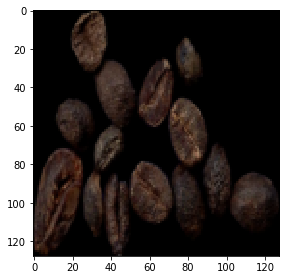

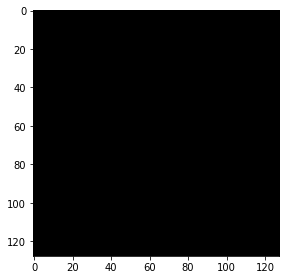

In [0]:
# idx = random.randint(0,len(X_train_array))

# preds_train = model.predict(X_train_array[:int(X_train_array.shape[0]*0.9)],verbose=1)
# preds_val = model.predict(X_train_array[int(X_train_array.shape[0]*0.9):],verbose=1)
# preds_test = model.predict(X_test_array, verbose = 1)


# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)

# ix = random.randint(0,len(preds_train_t))
# imshow(X_train_array[ix])
# plt.show()
# imshow(np.squeeze(Y_train_array[ix]))
# plt.show()
# imshow(np.squeeze(preds_train_t[ix]))
# plt.show()


# ix = random.randint(0,len(preds_val_t))
# imshow(X_train_array[int(X_train_array.shape[0]*0.9):][ix])
# # imshow(X_train[ix])
# print(1)
# plt.show()
# imshow(np.squeeze(Y_train_array[int(Y_train_array.shape[0]*0.9):][ix]))
# plt.show()
# imshow(np.squeeze(preds_val_t[ix]))
# plt.show()

# # ix = random.randint(0,len(preds_train_t))
# imshow(X_test[0])
# plt.show()
# # imshow(np.squeeze(Y_train[ix]))
# # plt.show()
# imshow(np.squeeze(preds_test_t[0]))
# plt.show()


In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
unet_model = Sequential()

In [0]:
unet_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding='same'))
unet_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding='same'))
fashion_model.add(MaxPooling2D((2, 2)))
# unet_model.add(LeakyReLU(alpha=0.1))

In [0]:
unet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
Total params: 64,992
Trainable params: 64,992
Non-trainable params: 0
__________________________________________________